In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

In [5]:
X,Y = data.data,data.target

In [6]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

6,7 = latitude,longitude , no effect on pricing

In [9]:
X1 = X[:,:6]

In [21]:
X1.shape

(20640, 6)

In [22]:
C = np.dot(X1.T,X1)

In [23]:
C

array([[3.83723229e+05, 2.22928568e+06, 4.65439543e+05, 8.64612451e+04,
        1.14096929e+08, 2.52959028e+05],
       [2.22928568e+06, 2.01984850e+07, 3.11067738e+06, 6.38694833e+05,
        7.55482945e+08, 1.85071039e+06],
       [4.65439543e+05, 3.11067738e+06, 7.34686462e+05, 1.43399883e+05,
        1.55555196e+08, 3.41507443e+05],
       [8.64612451e+04, 6.38694833e+05, 1.43399883e+05, 2.94589973e+04,
        3.15329544e+07, 6.88775051e+04],
       [1.14096929e+08, 7.55482945e+08, 1.55555196e+08, 3.15329544e+07,
        6.84090565e+10, 1.07303639e+08],
       [2.52959028e+05, 1.85071039e+06, 3.41507443e+05, 6.88775051e+04,
        1.07303639e+08, 2.42094243e+06]])

Ridge Regression , reguliazer = L2 norm, W = (C+AI)^-1(XY) 

E|w^ - w|| = trace((X^TX + AI)^-1)sigma^2.

In [24]:
A = [100,300,700]
Wr = []

for i in A:
    n = C.shape[0]
    regulizer = np.eye(n)
    regulizer *= i
    
    Cj = C + regulizer
    inv = np.linalg.pinv(Cj)
    comp = np.dot(X1.T,Y)
    wr = np.dot(inv,comp)
    Wr.append(wr)
    


In [25]:
C.shape

(6, 6)

In [26]:
Wr

[array([ 4.95072713e-01,  1.24895363e-02, -1.71519683e-01,  7.01936279e-01,
        -9.55180202e-06, -4.90077310e-03]),
 array([ 4.83482863e-01,  1.33947908e-02, -1.43741509e-01,  5.70348424e-01,
        -2.79963887e-06, -4.85541127e-03]),
 array([ 4.68539348e-01,  1.45183061e-02, -1.09703159e-01,  4.10979691e-01,
         5.68329701e-06, -4.79551036e-03])]

In [27]:
inv2 = np.linalg.pinv(C)

In [28]:
W = np.dot(inv2,np.dot(X1.T,Y))

In [29]:
W

array([ 5.02770277e-01,  1.18780586e-02, -1.90384317e-01,  7.91739138e-01,
       -1.40887336e-05, -4.93057331e-03])

In [30]:
df = pd.DataFrame(data=data.data ,columns=data.feature_names)

In [31]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [32]:
df['MedHouseVal'] = data.target

In [33]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [34]:
shrinkage_mats = []
for i in Wr:
    sw = i@C
    shrinkage_mats.append(sw)

In [35]:
shrinkage_mats

[array([1.96342360e+05, 1.25442277e+06, 2.40762244e+05, 4.62252925e+04,
        6.01959540e+07, 1.25230565e+05]),
 array([1.96246823e+05, 1.25442000e+06, 2.40788214e+05, 4.61243816e+04,
        6.01959540e+07, 1.25231532e+05]),
 array([1.96063890e+05, 1.25441385e+06, 2.40821884e+05, 4.60078003e+04,
        6.01959540e+07, 1.25233432e+05])]

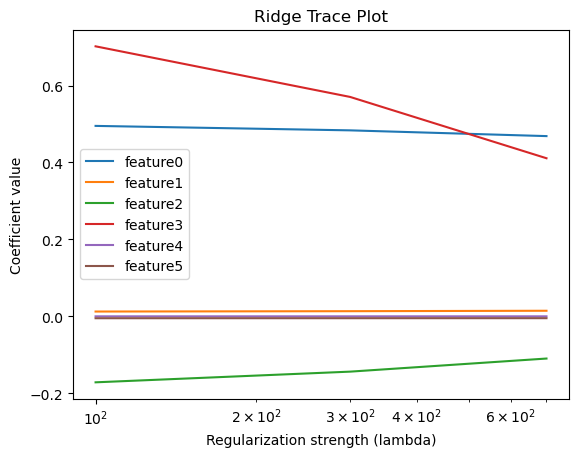

In [36]:
Wri = np.array(Wr)
for i in range(Wri.shape[1]):
    plt.plot(A,Wri[:,i],label= f"feature{i}")
plt.xscale("log")   
plt.xlabel("Regularization strength (lambda)")
plt.ylabel("Coefficient value")
plt.title("Ridge Trace Plot")
plt.legend()
plt.show()
    

In [37]:
Wri

array([[ 4.95072713e-01,  1.24895363e-02, -1.71519683e-01,
         7.01936279e-01, -9.55180202e-06, -4.90077310e-03],
       [ 4.83482863e-01,  1.33947908e-02, -1.43741509e-01,
         5.70348424e-01, -2.79963887e-06, -4.85541127e-03],
       [ 4.68539348e-01,  1.45183061e-02, -1.09703159e-01,
         4.10979691e-01,  5.68329701e-06, -4.79551036e-03]])

In [38]:
A2 = [1000,3000,7000]
Wr2 = []

for i in A2:
    n = C.shape[0]
    regulizer = np.eye(n)
    regulizer *= i
    
    Cj = C + regulizer
    inv = np.linalg.pinv(Cj)
    comp = np.dot(X1.T,Y)
    wr = np.dot(inv,comp)
    Wr2.append(wr)

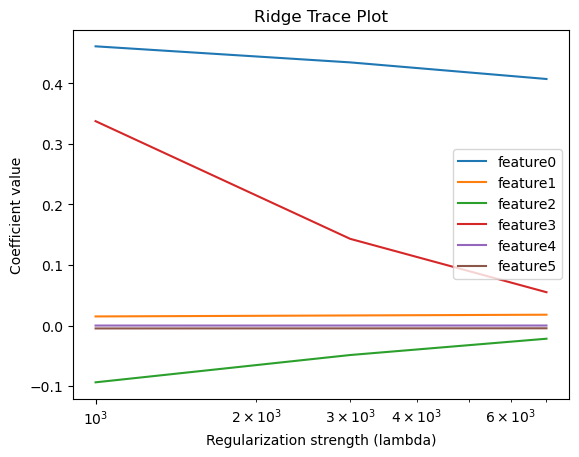

In [39]:
Wri2 = np.array(Wr2)
for i in range(Wri2.shape[1]):
    plt.plot(A2,Wri2[:,i],label= f"feature{i}")
plt.xscale("log")   
plt.xlabel("Regularization strength (lambda)")
plt.ylabel("Coefficient value")
plt.title("Ridge Trace Plot")
plt.legend()
plt.show()
    

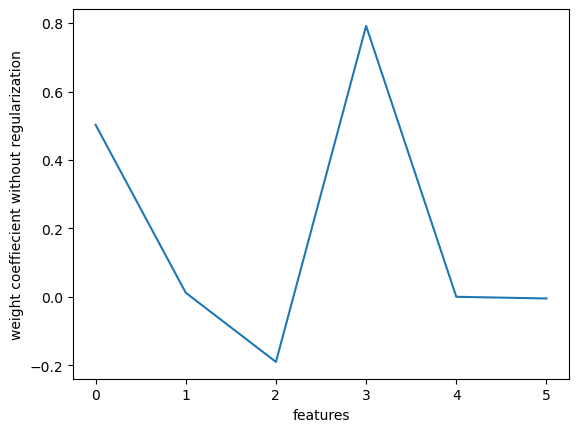

In [43]:

plt.plot(W,label= f"feature{i}")
plt.xlabel("features")
plt.ylabel("weight coeffiecient without regularization")
plt.show()


In [41]:
W.shape

(6,)

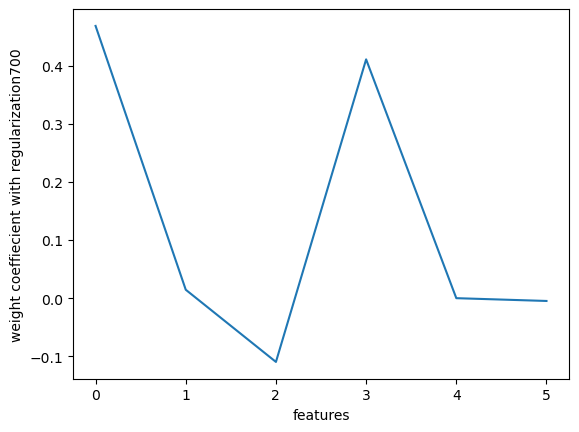

In [44]:
plt.plot(Wri[2])
plt.xlabel("features")
plt.ylabel(f"weight coeffiecient with regularization{A[2]}")
plt.show()

3rd feature shrinks, with A[1] lembda

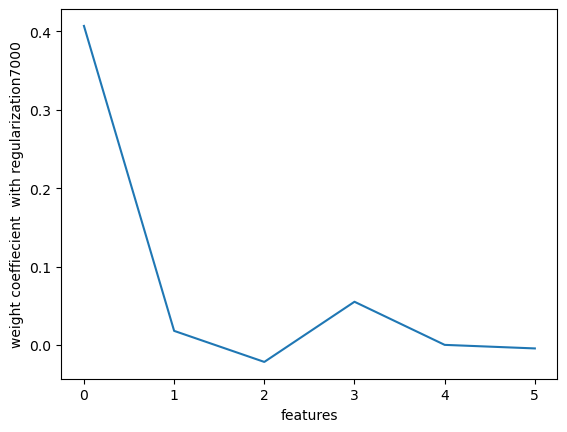

In [45]:
plt.plot(Wri2[2])
plt.xlabel("features")
plt.ylabel(f"weight coeffiecient  with regularization{A2[2]}")
plt.show()

3rd feature shrinks significantly , while 1 shrinks a bit

K cross fold validation 

Let's select the paramter by k cross fold

In [46]:
X_train,X_test = X1[:16000,],X1[16000:,]

In [47]:
X_test.shape

(4640, 6)

In [48]:
Y_train,Y_test = Y[:16000],Y[16000:]

In [49]:
def ridge_weights(x,y,r):
    c = np.dot(x.T,x)
    rg = np.eye(c.shape[0])
    rg *= r
    cj = c+rg 
    inv = np.linalg.pinv(cj)
    comp = np.dot(x.T,y)
    w = np.dot(inv,comp)
    return w 

In [50]:
def prediction(x,w):
    y_preds = np.zeros(x.shape[0],dtype=float)
    for i in range(x.shape[0]):
        pred = np.dot(x[i],w)
        y_preds[i] = pred
    return y_preds

In [51]:
def RMSE(Y_pred,Y_actual):
  
    s = 0
    for i in range(len(Y_pred)):
        s += (Y_pred[i] - Y_actual[i])**2
    mse = s/(len(Y_pred))
    rmse = mse**0.5
    return rmse

In [52]:
def R2(Y_pred,Y_actual):
    y_mean = np.mean(Y_actual)
    actual = np.sum((Y_pred - Y_actual)**2) 
    meaned = np.sum((Y_pred - np.mean(Y_actual))**2)
    
    r2 = 1-(actual/meaned)
    return r2
        

In [53]:
def K_cross_fold_validation(X_train,Y_train,k,Regulizer_c):
    n = X_train.shape[0]
    indxs = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(indxs)
    
    X_train_s = X_train[indxs,:]
    Y_train_s = Y_train[indxs]
    
    validate = X_train_s.shape[0]//k
    
    
    r_len = len(Regulizer_c)
    validation_errors = np.full(r_len,1e13,dtype='float')
    
    for r in range(len(Regulizer_c)):
        fold_error = []
        for i in range(k):
            intv = i*validate
            trainning_set_x = np.concatenate([X_train_s[:intv],X_train_s[intv+validate:]],axis=0)
            validation_set_x = X_train_s[intv : intv+validate]
            training_set_y = np.concatenate([Y_train_s[:intv],Y_train_s[intv+validate:]],axis=0)
            validation_set_y = Y_train_s[intv : intv+validate]
    
            weight = ridge_weights(trainning_set_x,training_set_y,Regulizer_c[r])
            predictions = prediction(validation_set_x,weight)
            errors = RMSE(predictions,validation_set_y)
    
            
            fold_error.append(errors)

        
        validation_errors[r] = np.mean(fold_error)  
            
    idx = np.argmin(validation_errors)
    return Regulizer_c[idx],validation_errors[idx]
    
    


In [54]:
l = [50,60,70,80,90,100,110,120,150,170,190]
o =0 
for i in range(1,4):
    h = l[o:(3*i)]
    o = 3*i 
    print(h)

[50, 60, 70]
[80, 90, 100]
[110, 120, 150]


In [55]:
lembda,rmse = K_cross_fold_validation(X_train,Y_train,4,l)

In [56]:
W = ridge_weights(X_train,Y_train,lembda)

In [57]:
W

array([ 4.90344036e-01,  1.22918265e-02, -1.79190397e-01,  7.57793970e-01,
       -1.09392494e-05, -1.27870974e-02])

In [58]:
training_prediction = prediction(X_train,W)
rmse_train = RMSE(training_prediction,Y_train)
R2_train = R2(training_prediction,Y_train)

In [59]:
rmse_train

0.7807608458219378

In [60]:
R2_train

-0.016900157716120745

In [61]:
testing_prediction = prediction(X_test,W)
rmse_test = RMSE(testing_prediction,Y_test)
R2_test = R2(testing_prediction,Y_test)

In [62]:
rmse_test

0.8330169545490519

In [63]:
R2_test

0.0589605669264891

In [64]:
x_std = X_train.std(axis=0)
fixed_std = np.where(x_std==0,1,x_std)
X_train_new = X_train - np.mean(X_train,axis=0) / fixed_std  

In [65]:
X_train_new

array([[ 6.29830897e+00,  3.87081843e+01,  4.97931938e+00,
        -1.09351291e+00,  3.20765272e+02,  1.97690522e+00],
       [ 6.27450897e+00,  1.87081843e+01,  4.23332948e+00,
        -1.14544194e+00,  2.39976527e+03,  1.53119149e+00],
       [ 5.23050897e+00,  4.97081843e+01,  6.28332799e+00,
        -1.04387611e+00,  4.94765272e+02,  2.22360955e+00],
       ...,
       [ 7.33340897e+00,  4.87081843e+01,  4.76077843e+00,
        -1.12979126e+00,  1.08876527e+03,  2.13955415e+00],
       [ 4.13230897e+00,  4.37081843e+01,  4.88455410e+00,
        -9.59875626e-01,  1.29176527e+03,  2.17241350e+00],
       [ 2.58020897e+00,  4.97081843e+01,  4.02538107e+00,
        -1.04185074e+00,  6.87765272e+02,  2.02134967e+00]])

In [66]:
lembda2,err = K_cross_fold_validation(X_train_new,Y_train,4,l)

In [67]:
lembda2

190

In [68]:
err

0.8315025971181809

In [69]:
W2 = ridge_weights(X_train_new,Y_train,lembda2)

In [70]:
training_prediction = prediction(X_train,W)
rmse_train = RMSE(training_prediction,Y_train)
R2_train = R2(training_prediction,Y_train)

In [71]:
rmse_train

0.7807608458219378

In [72]:
R2_train

-0.016900157716120745

In [73]:
alphas = np.logspace(-3, 3, 100)

In [74]:
alphas

array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
       2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
       4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
       8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
       1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
       2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
       4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
       8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
       1.41747416e+00, 1.62975083e+00, 1.87381742e+00, 2.15443469e+00,
      

In [75]:
lembda3,err3 =  K_cross_fold_validation(X_train,Y_train,4,alphas)

In [76]:
lembda

80

In [77]:
err3

0.7983820858366748

In [78]:
class Ridge_Regression:
    def __init__(self,alpha=0.6):
        self.alpha = alpha
        self.Weight = None 
        
    def ridge_weights(self,x,y,r):
        x_c = x - np.mean(x,axis=0)
        y_c = y - np.mean(y)
        c = np.dot(x_c.T,x_c)
        rg = np.eye(c.shape[0])
        rg *= r
        cj = c+rg 
        inv = np.linalg.pinv(cj)
        comp = np.dot(x_c.T,y_c)
        w = np.dot(inv,comp)
        self.intercept = np.mean(y) - np.dot(np.mean(x,axis=0),w)
        return w 
    
    def fit(self,X,Y):
        
        self.Weight = self.ridge_weights(X,Y,self.alpha)

    def prediction(self,x):
        if self.Weight is None:
            return "No fit was found to predict"
            
        self.y_preds = np.dot(x,self.Weight) + self.intercept 
        
        return self.y_preds
        
    def RMSE(self,Y_actual):
        if self.Weight is None:
            return "No fit was found to predict"
        
        if self.y_preds.shape != Y_actual.shape:
            return "Dimesions mismatch between predicted and actual vectors" 
        mse = np.mean((self.y_preds - Y_actual)**2)
        rmse = mse**0.5
        return rmse

    def R2(self,Y_actual):
        if self.y_preds.shape != Y_actual.shape:
            return "Dimesions mismatch between predicted and actual vectors"
       
        
        actual = np.sum((Y_actual- self.y_preds)**2 )
        meaned = np.sum((Y_actual - np.mean(Y_actual))**2)
        
        r2 = 1-(actual/meaned)
        return r2
            
    
    

In [79]:
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

In [80]:
X_diabetes.shape

(442, 10)

In [81]:
X_d_train,X_d_test = X_diabetes[:350,],X_diabetes[:350,]

In [82]:
X_d_train.shape

(350, 10)

In [83]:
Y_d_train,Y_d_test = y_diabetes[:350],y_diabetes[350:]

In [84]:
alphas = np.logspace(-3,3,100)

In [85]:
from sklearn.metrics import mean_squared_error,r2_score

In [86]:
from sklearn.linear_model import Ridge

Compairing Sklearn's Ridge Regression vs mine on Calfinornian House Price data set

In [87]:
skR = Ridge(alpha=80)

In [88]:
skM = Ridge_Regression(alpha=80)

In [89]:
skR.fit(X_train,Y_train)

Ridge(alpha=80)

In [90]:
skM.fit(X_train,Y_train)

In [91]:
mean_squared_error(skM.prediction(X_train),Y_train)

0.6019039181608977

In [92]:
mean_squared_error(skR.predict(X_train),Y_train)

0.6019039181608508

In [93]:
r2_score(skR.predict(X_train),Y_train)

0.09928065330189917

In [94]:
r2_score(skM.prediction(X_train),Y_train)

0.09928065330031333

testing scores for overfitting check

In [95]:
skR.predict(X_test)

array([2.51826095, 3.06118346, 2.5876031 , ..., 0.7761233 , 0.8996206 ,
       1.15188597])

In [96]:
mean_squared_error(skR.predict(X_test),Y_test)

0.6790979460354734

In [97]:
r2_score(skR.predict(X_test),Y_test)

0.1465757354509991

In [98]:
mean_squared_error(skM.prediction(X_test),Y_test)

0.6790979460355182

In [99]:
r2_score(skM.prediction(X_test),Y_test)

0.14657573544950675